In [1]:
import torch

In [2]:
torch.cuda.is_available()

True

In [3]:
device = torch.device('cuda')

In [6]:
# create random matrix
x = torch.randn(2, 2, device=device)
x

tensor([[ 0.1723, -0.6200],
        [ 0.4078, -0.2254]], device='cuda:0')

# Some Operations

In [7]:
x + 1

tensor([[1.1723, 0.3800],
        [1.4078, 0.7746]], device='cuda:0')

In [13]:
x @ x.T

tensor([[0.4141, 0.2100],
        [0.2100, 0.2171]], device='cuda:0')

In [9]:
torch.matmul(x, x.T)

tensor([[0.4141, 0.2100],
        [0.2100, 0.2171]], device='cuda:0')

In [12]:
x * x  # elementwise

tensor([[0.0297, 0.3844],
        [0.1663, 0.0508]], device='cuda:0')

# Autograd - backpropagation

In [25]:
w = torch.tensor([0.1], requires_grad=True)

In [26]:
b = torch.tensor([2.0], requires_grad=True)

In [27]:
x = torch.tensor([0.0])
y = torch.tensor([1.0])

Since w and b have requires_grad=True, operations involving these Tensors will cause PyTorch to build a computational graph, allowing automatic computation of gradients.

Since we are no longer implementing the backward pass by hand we don't need to keep references to intermediate values.

In [28]:
# Linear regression
y_pred = w * x + b

In [29]:
print(f'True label: {y}', f'\nPredicted: {y_pred}')

True label: tensor([1.]) 
Predicted: tensor([2.], grad_fn=<AddBackward0>)


In [30]:
loss = (y_pred - y) ** 2
loss

tensor([1.], grad_fn=<PowBackward0>)

In [31]:
loss.backward()

In [32]:
print(f'Gradient b: {b.grad}')
print(f'Gradient w: {w.grad}')

Gradient b: tensor([2.])
Gradient w: tensor([0.])


In [33]:
w.grad.zero_()
b.grad.zero_()

tensor([0.])

# PyTorch: nn

In [34]:
import torch

N = 64  # batch_size
D_in = 1000  # input dimension
H = 100  # hidden dimension
D_out = 10  # out dimension

x = torch.randn(N, D_in, device=device)
y = torch.randn(N, D_out, device=device)

In [38]:
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H).cuda(),
    torch.nn.ReLU().cuda(),
    torch.nn.Linear(H, D_out).cuda()
)

In [39]:
loss_fn = torch.nn.MSELoss()

In [40]:
y_pred = model(x)
loss = loss_fn(y_pred, y)

In [41]:
loss

tensor(1.0301, device='cuda:0', grad_fn=<MseLossBackward0>)

In [42]:
loss.item()

1.0301332473754883

In [43]:
loss.backward()

In [45]:
# Update the weights using gradient descent. Each parameter is a Tensor, so
# we can access its data and gradients like we did before.
# Example of parameter update
learning_rate = 1e-1
with torch.no_grad():
    for param in model.parameters():
        param.data -= learning_rate * param.grad
model.zero_grad()

# PyTorch: Custom nn Modules

## Forward function:


In [46]:
import torch


class TwolayerNet(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        super(TwolayerNet, self).__init__()
        self.linear1 = torch.nn.Linear(D_in, H)
        self.linear2 = torch.nn.Linear(H, D_out)

    def forward(self, x):
        relu = torch.nn.ReLU()
        h_relu = relu(self.linear1(x))
        y_pred = self.linear2(h_relu)
        return y_pred



In [47]:
N, D_in, H, D_out = 64, 1000, 100, 10
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

In [48]:
model = TwolayerNet(D_in, H, D_out)

In [50]:
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)

In [51]:
y_pred = model(x)
loss = loss_fn(y_pred, y)
loss.item()

0.9959993362426758

# Zero gradients, perform a backward pass, and update the weights.

In [52]:
optimizer.zero_grad()
loss.backward()
optimizer.step()

# We should loop

In [59]:
from tqdm import tqdm
from time import sleep

for i in (pbar := tqdm(range(100))):
    y_pred = model(x)
    loss = loss_fn(y_pred, y)
    pbar.set_description(f'{loss.item()}')
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    sleep(0.01)

7.712854355190757e-09: 100%|██████████| 100/100 [00:01<00:00, 65.04it/s]


# Linear regression

In [60]:
import torch
import numpy as np
from matplotlib import pyplot as plt
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn

In [61]:
class LinearRegression(torch.nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = torch.nn.Linear(1, 1, bias=True)

    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

In [62]:
model = LinearRegression()

In [63]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [70]:
def trainBuildIn(model, x, y, iter):
    for i in tqdm(range(iter)):
        optimizer.zero_grad()
        y_pred = model.forward(x)

        loss = criterion(y_pred, y)
        print(loss)
        loss.backward()

        optimizer.step()
        print('Iter {}, loss {}'.format(iter, loss.item()))


In [65]:
x = torch.tensor(range(-5, 5)).float()
w_gt = 3
b_gt = 4
y = w_gt * x + b_gt
y

tensor([-11.,  -8.,  -5.,  -2.,   1.,   4.,   7.,  10.,  13.,  16.])

In [66]:
x_train = x[:, None]
y_train = y[..., np.newaxis]

In [71]:
trainBuildIn(model, x_train, y_train, 10)

100%|██████████| 10/10 [00:00<00:00, 1550.52it/s]

tensor(121.0776, grad_fn=<MseLossBackward0>)
Iter 10, loss 121.07756042480469
tensor(88.2564, grad_fn=<MseLossBackward0>)
Iter 10, loss 88.25643157958984
tensor(65.4914, grad_fn=<MseLossBackward0>)
Iter 10, loss 65.49140930175781
tensor(49.6502, grad_fn=<MseLossBackward0>)
Iter 10, loss 49.65024185180664
tensor(38.5783, grad_fn=<MseLossBackward0>)
Iter 10, loss 38.57833480834961
tensor(30.7935, grad_fn=<MseLossBackward0>)
Iter 10, loss 30.793468475341797
tensor(25.2759, grad_fn=<MseLossBackward0>)
Iter 10, loss 25.275922775268555
tensor(21.3241, grad_fn=<MseLossBackward0>)
Iter 10, loss 21.324079513549805
tensor(18.4551, grad_fn=<MseLossBackward0>)
Iter 10, loss 18.455135345458984
tensor(16.3368, grad_fn=<MseLossBackward0>)
Iter 10, loss 16.336788177490234


In [72]:
y_pred_bi = model(x_train).data.numpy()

print("----- ----- ----- ----- -----")
print("Prediction:")
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)
print("Ground-truth:")
print("w_gt = {:.2f}, b_gt = {:.2f}".format(w_gt, b_gt))

----- ----- ----- ----- -----
Prediction:
linear.weight tensor([[2.2304]])
linear.bias tensor([0.4761])
Ground-truth:
w_gt = 3.00, b_gt = 4.00


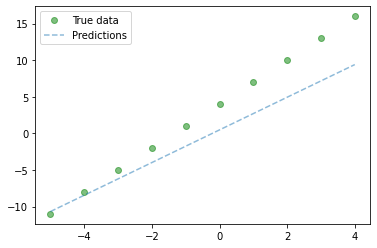

In [73]:
plt.clf()
plt.plot(x, y, 'go', label='True data', alpha=0.5)
plt.plot(x, y_pred_bi, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

# Validation with SKLEARN


In [74]:
from sklearn.linear_model import LinearRegression

linr = LinearRegression()
linr.fit(x[:, None], y[:, None])
print("----- ----- ----- ----- -----")
print("Prediction:")
print("w_pred = {:.2f}, b_pred = {:.2f}".format(float(linr.intercept_), float(linr.coef_[0])))
print("Ground-truth:")
print("w_gt = {:.2f}, b_gt = {:.2f}".format(w_gt, b_gt))

----- ----- ----- ----- -----
Prediction:
w_pred = 4.00, b_pred = 3.00
Ground-truth:
w_gt = 3.00, b_gt = 4.00


# Transfer learning

In [75]:
import torch, torchvision
from torchvision import datasets, models, transforms
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import time
from torchsummary import summary

import numpy as np
import matplotlib.pyplot as plt
import os

from PIL import Image

In [76]:
# Applying Transforms to the Data
image_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(size=256, scale=(0.8, 1.0)),
        transforms.RandomRotation(degrees=15),
        transforms.RandomHorizontalFlip(),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
    'valid': transforms.Compose([
        transforms.RandomResizedCrop(size=256, scale=(0.8, 1.0)),
        transforms.RandomRotation(degrees=15),
        transforms.RandomHorizontalFlip(),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.RandomResizedCrop(size=256, scale=(0.8, 1.0)),
        transforms.RandomRotation(degrees=15),
        transforms.RandomHorizontalFlip(),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ])
}

In [77]:
# Load the Data

# Set train and valid directory paths
dataset = 'caltec256subset'

train_directory = os.path.join(dataset, 'train')
valid_directory = os.path.join(dataset, 'valid')

# Batch size
bs = 32

# Number of classes
num_classes = len(os.listdir(valid_directory))  #10#2#257
print(num_classes)

3


In [78]:
# Load Data from folders
data = {
    'train': datasets.ImageFolder(root=train_directory, transform=image_transforms['train']),
    'valid': datasets.ImageFolder(root=valid_directory, transform=image_transforms['valid'])
}

In [79]:
# Get a mapping of the indices to the class names, in order to see the output classes of the test images.
idx_to_class = {v: k for k, v in data['train'].class_to_idx.items()}
print(idx_to_class)

# Size of Data, to be used for calculating Average Loss and Accuracy
train_data_size = len(data['train'])
valid_data_size = len(data['valid'])

# Create iterators for the Data loaded using DataLoader module
train_data_loader = DataLoader(data['train'], batch_size=bs, shuffle=True)
valid_data_loader = DataLoader(data['valid'], batch_size=bs, shuffle=True)

{0: 'bear', 1: 'gorilla', 2: 'other'}


In [80]:
train_data_size, valid_data_size

(150, 60)

In [161]:
class AlexCustom(torch.nn.Module):
    def __init__(self, num_classes):
        super(AlexCustom, self).__init__()
        self.alexnet = models.alexnet(pretrained=True)
        # Freeze model parameters
        for param in self.alexnet.parameters():
            param.requires_grad = False

        self.ft = self.alexnet.features
        self.avg = self.alexnet.avgpool
        self.classifier = self.alexnet.classifier[:6]
        self.linear0 = nn.Linear(4096, num_classes)
        # self.output1 = self.features_extract.classifier[5]
        self.linear1 = nn.ReLU()
        self.linear2 = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = self.ft(x)
        x = self.avg(x)
        x = x.reshape(-1, 9216)
        y_1 = self.classifier(x)
        x = self.linear0(y_1)
        x = self.linear1(x)
        y_2 = self.linear2(x)
        return y_1, y_2

In [166]:
model1 = AlexCustom(num_classes).cuda()

x = torch.rand(2, 3, 244, 244).cuda()
model1(x)

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0'),
 tensor([[-1.3671, -1.3671, -0.7127],
         [-1.3771, -1.3803, -0.7008]], device='cuda:0',
        grad_fn=<LogSoftmaxBackward0>))

In [163]:
summary(model1, (3, 224, 224)) # 1 output =

Layer (type:depth-idx)                   Output Shape              Param #
├─AlexNet: 1                             []                        --
|    └─Sequential: 2-1                   [-1, 256, 6, 6]           --
├─Sequential: 1-1                        [-1, 256, 6, 6]           (recursive)
├─AlexNet: 1                             []                        --
|    └─Sequential: 2                     []                        --
|    |    └─Conv2d: 3-1                  [-1, 64, 55, 55]          (23,296)
├─Sequential: 1                          []                        --
|    └─Conv2d: 2-2                       [-1, 64, 55, 55]          (recursive)
├─AlexNet: 1                             []                        --
|    └─Sequential: 2                     []                        --
|    |    └─ReLU: 3-2                    [-1, 64, 55, 55]          --
├─Sequential: 1                          []                        --
|    └─ReLU: 2-3                         [-1, 64, 55, 55]    

Layer (type:depth-idx)                   Output Shape              Param #
├─AlexNet: 1                             []                        --
|    └─Sequential: 2-1                   [-1, 256, 6, 6]           --
├─Sequential: 1-1                        [-1, 256, 6, 6]           (recursive)
├─AlexNet: 1                             []                        --
|    └─Sequential: 2                     []                        --
|    |    └─Conv2d: 3-1                  [-1, 64, 55, 55]          (23,296)
├─Sequential: 1                          []                        --
|    └─Conv2d: 2-2                       [-1, 64, 55, 55]          (recursive)
├─AlexNet: 1                             []                        --
|    └─Sequential: 2                     []                        --
|    |    └─ReLU: 3-2                    [-1, 64, 55, 55]          --
├─Sequential: 1                          []                        --
|    └─ReLU: 2-3                         [-1, 64, 55, 55]    

In [164]:
model1

AlexCustom(
  (alexnet): AlexNet(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
      (1): ReLU(inplace=True)
      (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
      (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (4): ReLU(inplace=True)
      (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
      (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (7): ReLU(inplace=True)
      (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (9): ReLU(inplace=True)
      (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
    (classifier): Sequential(
      (0): Dropout(p=0.5, inplace=False)
    

In [81]:
alexnet = models.alexnet(pretrained=True)
alexnet

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to C:\Users\Andrew/.cache\torch\hub\checkpoints\alexnet-owt-7be5be79.pth
10.1%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

23.0%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

46.1%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--Notebo

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [82]:
# Freeze model parameters
for param in alexnet.parameters():
    param.requires_grad = False

In [83]:
# Change the final layer of AlexNet Model for Transfer Learning
alexnet.classifier[6] = nn.Linear(4096, num_classes)
alexnet.classifier.add_module("7", nn.LogSoftmax(dim=1))
alexnet

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [84]:
summary(alexnet, (3, 224, 224))

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 256, 6, 6]           --
|    └─Conv2d: 2-1                       [-1, 64, 55, 55]          (23,296)
|    └─ReLU: 2-2                         [-1, 64, 55, 55]          --
|    └─MaxPool2d: 2-3                    [-1, 64, 27, 27]          --
|    └─Conv2d: 2-4                       [-1, 192, 27, 27]         (307,392)
|    └─ReLU: 2-5                         [-1, 192, 27, 27]         --
|    └─MaxPool2d: 2-6                    [-1, 192, 13, 13]         --
|    └─Conv2d: 2-7                       [-1, 384, 13, 13]         (663,936)
|    └─ReLU: 2-8                         [-1, 384, 13, 13]         --
|    └─Conv2d: 2-9                       [-1, 256, 13, 13]         (884,992)
|    └─ReLU: 2-10                        [-1, 256, 13, 13]         --
|    └─Conv2d: 2-11                      [-1, 256, 13, 13]         (590,080)
|    └─ReLU: 2-12                        [-1, 256, 

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 256, 6, 6]           --
|    └─Conv2d: 2-1                       [-1, 64, 55, 55]          (23,296)
|    └─ReLU: 2-2                         [-1, 64, 55, 55]          --
|    └─MaxPool2d: 2-3                    [-1, 64, 27, 27]          --
|    └─Conv2d: 2-4                       [-1, 192, 27, 27]         (307,392)
|    └─ReLU: 2-5                         [-1, 192, 27, 27]         --
|    └─MaxPool2d: 2-6                    [-1, 192, 13, 13]         --
|    └─Conv2d: 2-7                       [-1, 384, 13, 13]         (663,936)
|    └─ReLU: 2-8                         [-1, 384, 13, 13]         --
|    └─Conv2d: 2-9                       [-1, 256, 13, 13]         (884,992)
|    └─ReLU: 2-10                        [-1, 256, 13, 13]         --
|    └─Conv2d: 2-11                      [-1, 256, 13, 13]         (590,080)
|    └─ReLU: 2-12                        [-1, 256, 

In [85]:
# Define Optimizer and Loss Function
loss_func = nn.NLLLoss()
optimizer = optim.Adam(alexnet.parameters())
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    maximize: False
    weight_decay: 0
)

In [86]:
def train_and_validate(model, loss_criterion, optimizer, epochs=25):
    '''
    Function to train and validate
    Parameters
        :param model: Model to train and validate
        :param loss_criterion: Loss Criterion to minimize
        :param optimizer: Optimizer for computing gradients
        :param epochs: Number of epochs (default=25)

    Returns
        model: Trained Model with best validation accuracy
        history: (dict object): Having training loss, accuracy and validation loss, accuracy
    '''

    start = time.time()
    history = []
    best_acc = 0.0

    for epoch in range(epochs):
        epoch_start = time.time()
        print("Epoch: {}/{}".format(epoch + 1, epochs))

        # Set to training mode
        model.train()

        # Loss and Accuracy within the epoch
        train_loss = 0.0
        train_acc = 0.0

        valid_loss = 0.0
        valid_acc = 0.0

        for i, (inputs, labels) in enumerate(train_data_loader):
            inputs = inputs.to(device)
            labels = labels.to(device)

            # Clean existing gradients
            optimizer.zero_grad()

            # Forward pass - compute outputs on input data using the model
            outputs = model(inputs)

            # Compute loss
            loss = loss_criterion(outputs, labels)




            # Compute the total loss for the batch and add it to train_loss
            train_loss += loss.item() * inputs.size(0)

            # Compute the accuracy
            ret, predictions = torch.max(outputs.data, 1)
            correct_counts = predictions.eq(labels.data.view_as(predictions))

            # Convert correct_counts to float and then compute the mean
            acc = torch.mean(correct_counts.type(torch.FloatTensor))

            # Compute total accuracy in the whole batch and add to train_acc
            train_acc += acc.item() * inputs.size(0)

            #print("Batch number: {:03d}, Training: Loss: {:.4f}, Accuracy: {:.4f}".format(i, loss.item(), acc.item()))

        # Validation - No gradient tracking needed
        with torch.no_grad():

            # Set to evaluation mode
            model.eval()

            # Validation loop
            for j, (inputs, labels) in enumerate(valid_data_loader):
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Forward pass - compute outputs on input data using the model
                outputs = model(inputs)

                # Compute loss
                loss = loss_criterion(outputs, labels)

                # Compute the total loss for the batch and add it to valid_loss
                valid_loss += loss.item() * inputs.size(0)

                # Calculate validation accuracy
                ret, predictions = torch.max(outputs.data, 1)
                correct_counts = predictions.eq(labels.data.view_as(predictions))

                # Convert correct_counts to float and then compute the mean
                acc = torch.mean(correct_counts.type(torch.FloatTensor))

                # Compute total accuracy in the whole batch and add to valid_acc
                valid_acc += acc.item() * inputs.size(0)

                #print("Validation Batch number: {:03d}, Validation: Loss: {:.4f}, Accuracy: {:.4f}".format(j, loss.item(), acc.item()))

        # Find average training loss and training accuracy
        avg_train_loss = train_loss / train_data_size
        avg_train_acc = train_acc / train_data_size

        # Find average training loss and training accuracy
        avg_valid_loss = valid_loss / valid_data_size
        avg_valid_acc = valid_acc / valid_data_size

        history.append([avg_train_loss, avg_valid_loss, avg_train_acc, avg_valid_acc])

        epoch_end = time.time()

        print(
            "Epoch : {:03d}, Training: Loss: {:.4f}, Accuracy: {:.4f}%, \n\t\tValidation : Loss : {:.4f}, Accuracy: {:.4f}%, Time: {:.4f}s".format(
                epoch + 1, avg_train_loss, avg_train_acc * 100, avg_valid_loss, avg_valid_acc * 100,
                epoch_end - epoch_start))

        # Save if the model has best accuracy till now
        #torch.save(model, dataset+'_model_'+str(epoch)+'.pt')

    return model, history

In [87]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

num_epochs = 5
trained_model, history = train_and_validate(alexnet, loss_func, optimizer, num_epochs)

Epoch: 1/5
Epoch : 001, Training: Loss: 0.8404, Accuracy: 60.6667%, 
		Validation : Loss : 0.4852, Accuracy: 78.3333%, Time: 1.4171s
Epoch: 2/5
Epoch : 002, Training: Loss: 0.3235, Accuracy: 87.3333%, 
		Validation : Loss : 0.3943, Accuracy: 80.0000%, Time: 1.1879s
Epoch: 3/5
Epoch : 003, Training: Loss: 0.1779, Accuracy: 94.6667%, 
		Validation : Loss : 0.2833, Accuracy: 86.6667%, Time: 1.2841s
Epoch: 4/5
Epoch : 004, Training: Loss: 0.1003, Accuracy: 96.6667%, 
		Validation : Loss : 0.3198, Accuracy: 81.6667%, Time: 1.3139s
Epoch: 5/5
Epoch : 005, Training: Loss: 0.0756, Accuracy: 98.6667%, 
		Validation : Loss : 0.3528, Accuracy: 83.3333%, Time: 1.2956s


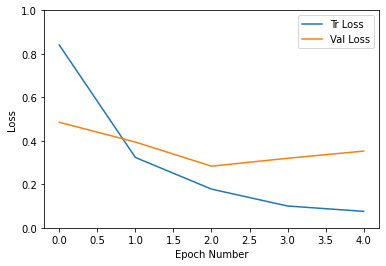

In [88]:
history = np.array(history)
plt.plot(history[:, 0:2])
plt.legend(['Tr Loss', 'Val Loss'])
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.ylim(0, 1)
plt.savefig(dataset + '_loss_curve.png')
plt.show()

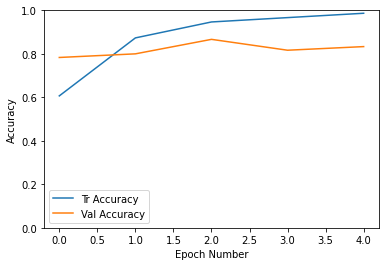

In [89]:
plt.plot(history[:, 2:4])
plt.legend(['Tr Accuracy', 'Val Accuracy'])
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.savefig(dataset + '_accuracy_curve.png')
plt.show()

In [104]:
def predict(model, test_image_name):
    '''
    Function to predict the class of a single test image
    Parameters
        :param model: Model to test
        :param test_image_name: Test image

    '''

    transform = image_transforms['test']

    test_image = Image.open(test_image_name)
    plt.imshow(test_image)

    test_image_tensor = transform(test_image)

    if torch.cuda.is_available():
        test_image_tensor = test_image_tensor.view(1, 3, 224, 224).cuda()
    else:
        test_image_tensor = test_image_tensor.view(1, 3, 224, 224)

    with torch.no_grad():
        model.eval()
        # Model outputs log probabilities
        out = model(test_image_tensor)
        ps = torch.exp(out)
        topk, topclass = ps.topk(3, dim=1)
        for i in range(3):
            print("Predcition", i + 1, ":", idx_to_class[topclass.cpu().numpy()[0][i]], ", Score: ",
                  topk.cpu().numpy()[0][i])

Predcition 1 : bear , Score:  0.9991843
Predcition 2 : gorilla , Score:  0.00076210866
Predcition 3 : other , Score:  5.360215e-05


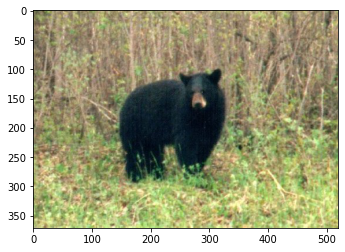

In [105]:
predict(trained_model, 'caltec256subset/test/009_0098.jpg')

Predcition 1 : gorilla , Score:  0.9901328
Predcition 2 : bear , Score:  0.009866573
Predcition 3 : other , Score:  5.795547e-07


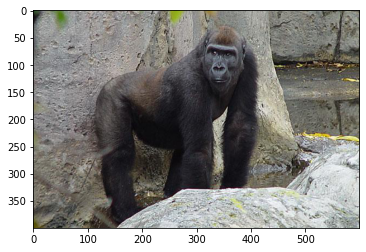

In [101]:
predict(trained_model, 'caltec256subset/test/090_0107.jpg')